## How are in-demand skills trending for Engineers?

**Methodology**

1. Aggregate skill counts monthly
2. Re-analyze based on percentage of total jobs
3. Plot the monthly skill demand

In [11]:
# Importing libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### Group the Skills by Month

In [12]:
american_countries = [
    'United States', 'Canada', 'Mexico', 'Brazil', 'Argentina', 'Colombia',
    'Chile', 'Peru', 'Venezuela', 'Ecuador', 'Bolivia', 'Paraguay',
    'Uruguay', 'Guyana', 'Suriname', 'Panama', 'Costa Rica', 'Guatemala',
    'Honduras', 'Nicaragua', 'El Salvador', 'Belize', 'Cuba', 'Haiti',
    'Dominican Republic', 'Jamaica', 'Trinidad and Tobago', 'Bahamas'
]

df_america = df[(df['job_title_short'].str.contains('Engineer')) & (df['job_country'].isin(american_countries))].copy()

In [13]:
df_america['job_posted_month_no'] = df_america['job_posted_date'].dt.month

In [14]:
df_america_explode = df_america.explode('job_skills')

### Pivot in Prep for Plotting

In [15]:
df_america_pivot = df_america_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

df_america_pivot

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,1057,2,104,121,12,152,2,1,4,26,...,1,191,5,172,0,0,2,3,32,31
2,909,5,115,91,9,108,0,3,7,21,...,2,167,8,159,0,0,0,1,41,25
3,1007,2,99,81,5,128,2,5,7,19,...,1,141,4,165,0,1,1,0,29,13
4,1020,3,98,107,2,115,1,2,5,17,...,1,138,3,127,0,0,0,0,24,18
5,943,0,104,122,2,112,0,5,5,9,...,0,137,8,112,2,0,0,1,33,17
6,1047,1,145,107,7,125,1,1,8,21,...,1,172,7,126,1,1,0,0,41,28
7,972,7,114,104,1,120,1,3,10,17,...,6,192,12,135,2,0,0,4,36,22
8,1117,21,114,150,2,182,2,10,6,36,...,1,256,8,133,1,0,0,0,41,29
9,1046,4,92,116,3,127,0,1,8,22,...,4,182,4,163,1,0,0,0,41,16


### Sort columns by count and change month numbers to names

In [16]:
# sorts by count
df_america_pivot.loc['Total'] = df_america_pivot.sum()
df_america_pivot = df_america_pivot[df_america_pivot.loc['Total'].sort_values(ascending=False).index]
df_america_pivot = df_america_pivot.drop('Total')

df_america_pivot

job_skills,python,sql,aws,azure,spark,java,snowflake,kafka,scala,hadoop,...,fedora,kali,asp.netcore,homebrew,mlr,visualbasic,pascal,tidyr,ocaml,mlpack
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,4617,4541,3022,2371,2374,1933,1352,1444,1355,1316,...,0,0,0,0,0,0,0,0,0,0
2,4120,4038,2833,1992,2167,1684,1390,1275,1225,1257,...,0,0,0,0,0,0,0,0,0,0
3,4288,4277,2932,2074,2133,1615,1329,1214,1221,1244,...,0,0,0,0,0,0,0,1,0,0
4,4023,4054,2667,2057,1937,1496,1314,1099,1114,1084,...,0,0,0,0,0,0,0,0,0,0
5,3955,3934,2523,1913,1925,1440,1265,1021,1063,1021,...,0,0,1,0,0,0,0,0,0,0
6,4240,4436,2742,2138,2134,1534,1363,1148,1057,1122,...,0,2,0,0,0,0,0,0,0,0
7,4142,4200,2782,2071,1930,1507,1260,1062,1083,1061,...,0,0,0,0,0,0,0,0,0,0
8,5131,5079,3383,2520,2256,1855,1499,1300,1258,1214,...,0,0,1,1,0,0,0,0,0,0
9,4501,4439,2823,2148,2035,1483,1319,1059,1009,1003,...,0,0,0,0,0,0,1,0,0,0


### Plot the Monthly Skill Counts

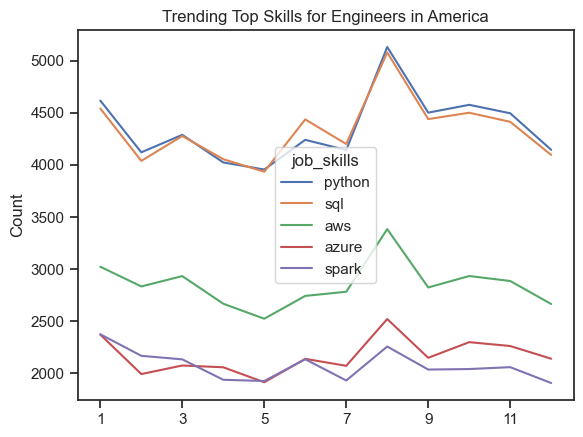

In [17]:
df_america_pivot.iloc[:, :5].plot(kind='line')

plt.title('Trending Top Skills for Engineers in America')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

### Calculate Percentage of Total Jobs

In [18]:
DE_totals = df_america.groupby('job_posted_month_no').size()

DE_totals

job_posted_month_no
1     7736
2     6550
3     6906
4     6663
5     6139
6     6866
7     7154
8     8900
9     8095
10    8344
11    7834
12    7366
dtype: int64

In [19]:
# Divide first 12 rows of df_america_pivot by DE_totals
df_america_percent = df_america_pivot.iloc[:12].div(DE_totals/100, axis=0)

# Changes month number to month name
df_america_percent = df_america_percent.reset_index()
df_america_percent['job_posted_month'] = df_america_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_america_percent = df_america_percent.set_index('job_posted_month')
df_america_percent = df_america_percent.drop(columns='job_posted_month_no')

df_america_percent

job_skills,python,sql,aws,azure,spark,java,snowflake,kafka,scala,hadoop,...,fedora,kali,asp.netcore,homebrew,mlr,visualbasic,pascal,tidyr,ocaml,mlpack
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,59.682006,58.699586,39.064116,30.648914,30.687694,24.987073,17.476732,18.665977,17.515512,17.011375,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
Feb,62.900763,61.648855,43.251908,30.412214,33.083969,25.709924,21.221374,19.465649,18.702290,19.190840,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
Mar,62.090935,61.931654,42.455836,30.031856,30.886186,23.385462,19.244136,17.578917,17.680278,18.013322,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.01448,0.000000,0.000000
Apr,60.378208,60.843464,40.027015,30.871980,29.070989,22.452349,19.720846,16.494072,16.719196,16.268948,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
May,64.424173,64.082098,41.097899,31.161427,31.356899,23.456589,20.605962,16.631373,17.315524,16.631373,...,0.000000,0.000000,0.016289,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
Jun,61.753568,64.608214,39.935916,31.138946,31.080687,22.341975,19.851442,16.720070,15.394699,16.341392,...,0.000000,0.029129,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
Jul,57.897680,58.708415,38.887336,28.948840,26.977914,21.065138,17.612524,14.844842,15.138384,14.830864,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
Aug,57.651685,57.067416,38.011236,28.314607,25.348315,20.842697,16.842697,14.606742,14.134831,13.640449,...,0.000000,0.000000,0.011236,0.011236,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
Sep,55.602224,54.836319,34.873379,26.534898,25.138975,18.319951,16.294009,13.082149,12.464484,12.390364,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012353,0.00000,0.000000,0.000000


### Plot Mothly Skill Demand

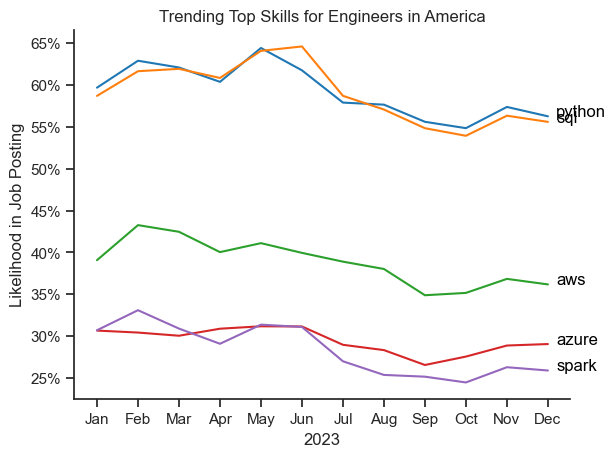

In [ ]:
from matplotlib.ticker import PercentFormatter

df_plot = df_america_percent.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False, legend='full', palette='tab10')
sns.set_theme(style='ticks')
sns.despine()

plt.title('Trending Top Skills for Engineers in America')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))

for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i], color='black')

plt.show()